 lowpass filter
 sample rate, fs=250 
 cutoff_hz = 12.5 
 width of transition, width=5 hz 
 ripple_db=60 
 FIR filter size: numtaps = 183, time = 0.732 s 
 delay = 91 , delay_time = 0.366 s


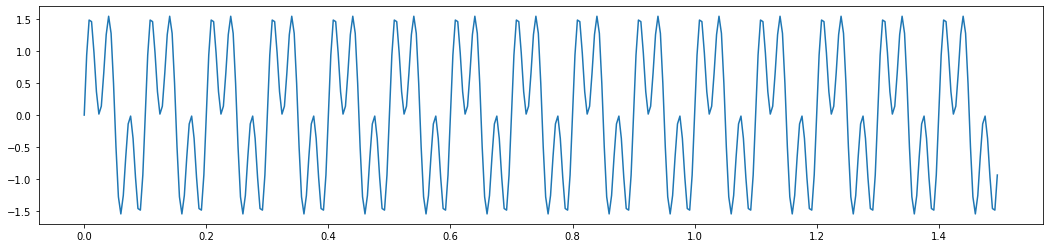

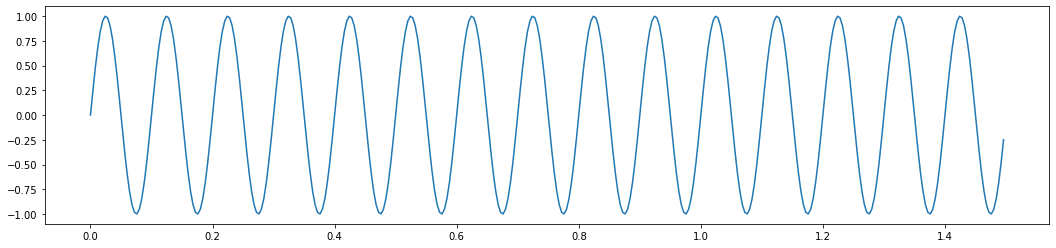

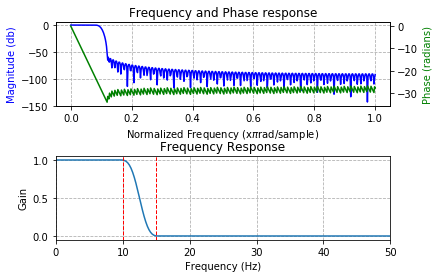

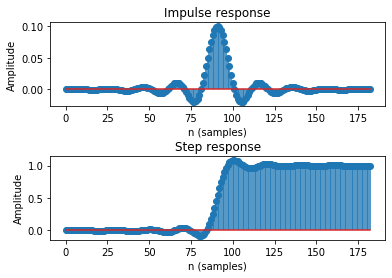

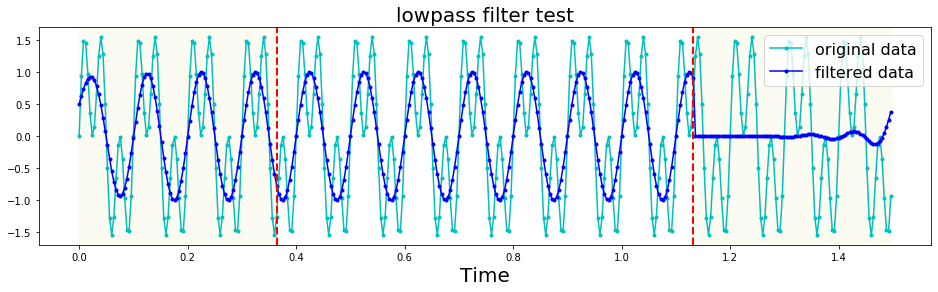

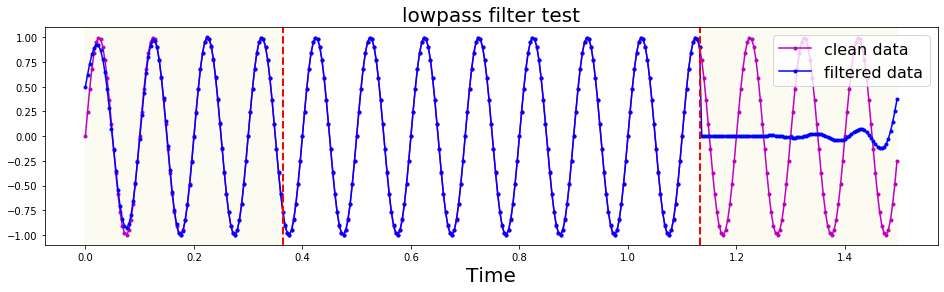

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import signal, fftpack
from pylab import *
import spudtr.filters as filters

import logging as LOGGER
from scipy.signal import kaiserord, firwin, freqz, lfilter

plt.clf()
plt.close('all')

# creat a fake noise data to show the filter
freq_list = [10, 30]
amplitude_list = [1.0, 1.0]
sampling_freq = 250
t, y = filters._sins_test_data(freq_list, amplitude_list, sampling_freq)
#plt.clf()
# because we need to test lowpass filter to filter 30 in above freq_list, so create the clean data
freq_list = [10]
amplitude_list = [1.0]
t, y1 = filters._sins_test_data(freq_list, amplitude_list, sampling_freq)
#plt.clf()

testdata = pd.DataFrame({"fakedata": y})

ftype = "lowpass"
window = "kaiser"
cutoff_list = [12.5]
#window_list = ['kaiser','hamming','hann','blackman']
cutoff_hz = 12.5
width_hz = 5
ripple_db = 60
sfreq = sampling_freq

filt_test_df = filters.epochs_filters(
    testdata,
    ["fakedata"],
    ftype,
    window,
    cutoff_hz,
    width_hz,
    ripple_db,
    sfreq,
    trim_edges=False,
)
y_filt = filt_test_df["fakedata"]


# need to N to cut edge data
taps = filters._design_firwin_filter(cutoff_hz, width_hz, ripple_db, sfreq, ftype, window)
N = len(taps)

# print filter information
text1 = f" {ftype} filter"
print(text1)
text2 = f" sample rate, fs={sfreq} \n cutoff_hz = {cutoff_hz} \n width of transition, width={width_hz} hz \n ripple_db={ripple_db} \n FIR filter size: numtaps = {len(taps)}, time = {len(taps)/sfreq} s \n delay = {int((len(taps) - 1) / 2)} , delay_time = {len(taps)/(2*sfreq)} s"
print(text2)

# show filter respone images
fig1 = filters._mfreqz(taps,sfreq,cutoff_hz,width_hz,a=1)
fig2 = filters._impz(taps,a=1)

fig, ax = plt.subplots(figsize=(16, 4))

ax.plot(t,y, '.-',  color= 'c', linestyle='-', label="original data")
ax.plot(t,y_filt, '.-',  color= 'b', linestyle='-', label="filtered data")
half_width = int(np.floor(N / 2))
times = t
start_good = times[half_width]  # == first good sample b.c. 0-base index
stop_good = times[-(half_width + 1)]
ax.axvline(start_good, linestyle='--', linewidth=2, color='r')
ax.axvspan(min(times), start_good, alpha=0.05, color='y')
ax.axvline(stop_good, linestyle='--', linewidth=2, color='r')
ax.axvspan(stop_good, max(times), alpha=0.05, color='y')  

ax.set_title(f"{ftype} filter test", fontsize=20)
ax.set_xlabel('Time', fontsize=20)
ax.legend(fontsize=16,loc=1)
#ax.grid(True)

fig, ax = plt.subplots(figsize=(16, 4))

ax.plot(t,y1, '.-',  color= 'm', linestyle='-', label="clean data")
ax.plot(t,y_filt, '.-',  color= 'b', linestyle='-', label="filtered data")
half_width = int(np.floor(N / 2))
times = t
start_good = times[half_width]  # == first good sample b.c. 0-base index
stop_good = times[-(half_width + 1)]
ax.axvline(start_good, linestyle='--', linewidth=2, color='r')
ax.axvspan(min(times), start_good, alpha=0.05, color='y')
ax.axvline(stop_good, linestyle='--', linewidth=2, color='r')
ax.axvspan(stop_good, max(times), alpha=0.05, color='y')  

ax.set_title(f"{ftype} filter test", fontsize=20)
ax.set_xlabel('Time', fontsize=20)
ax.legend(fontsize=16,loc=1)

plt.show()



 bandpass filter
 sample rate, fs=250 
 cutoff_hz = [18, 35] 
 width of transition, width=5 hz 
 ripple_db=60 
 FIR filter size: numtaps = 183, time = 0.732 s 
 delay = 91 , delay_time = 0.366 s


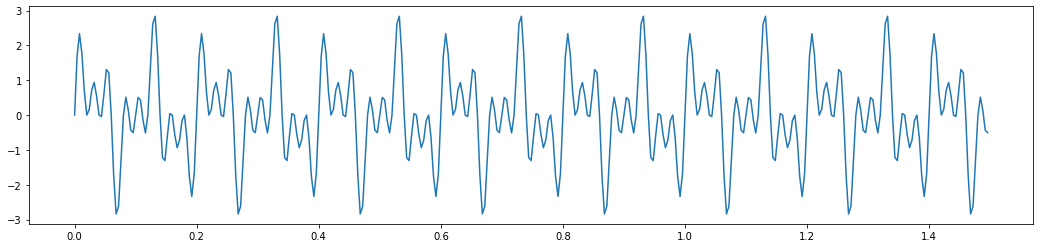

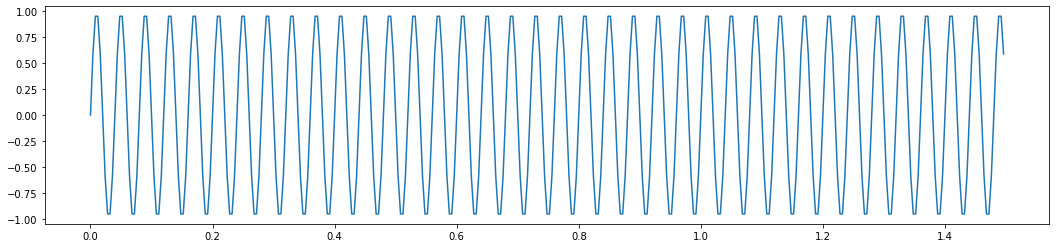

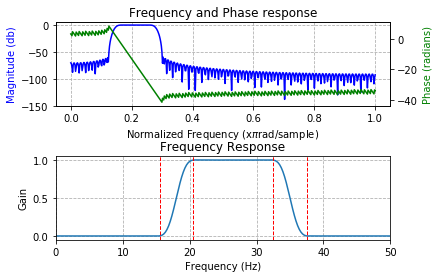

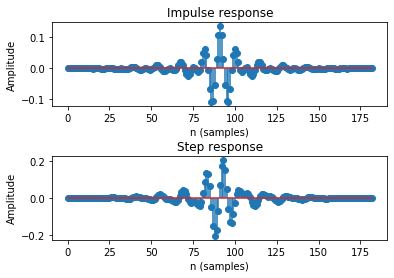

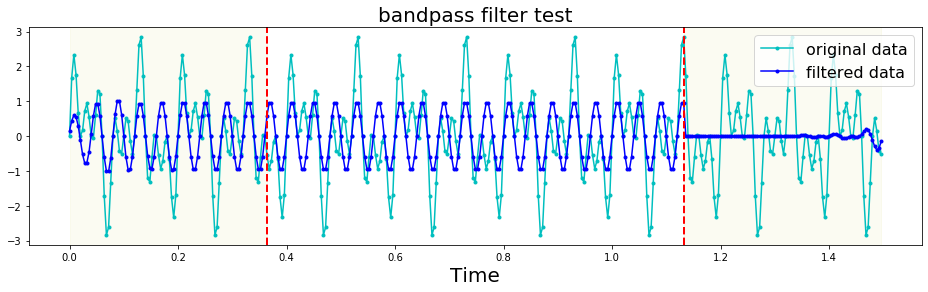

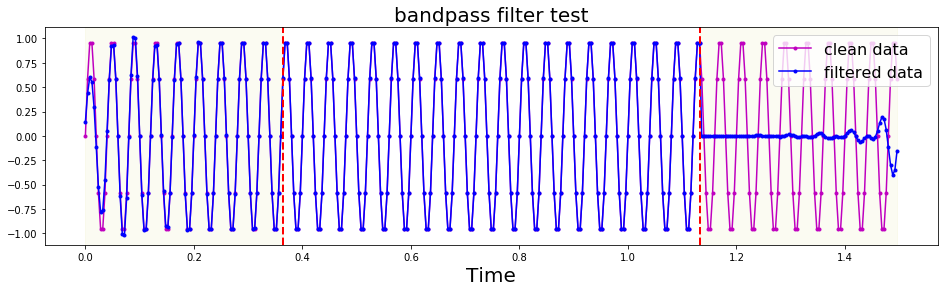

In [27]:
#---bandpass test
# creat a fake noise data to show the filter
freq_list = [10, 25, 40]
amplitude_list = [1.0, 1.0, 1.0]
t, y = filters._sins_test_data(freq_list, amplitude_list, sampling_freq)
#plt.clf()
# we need to try bandpass filter, we will keep 25 in freq_list, and filter out 10, 40, so create a clean data
freq_list = [25]
amplitude_list = [1.0]
t, y1 = filters._sins_test_data(freq_list, amplitude_list, sampling_freq)
#plt.clf()

testdata = pd.DataFrame({"fakedata": y})

ftype = "bandpass"
window = "kaiser"
cutoff_hz = [18, 35]
width_hz = 5
ripple_db = 60
sfreq = sampling_freq

filt_test_df = filters.epochs_filters(
    testdata,
    ["fakedata"],
    ftype,
    window,
    cutoff_hz,
    width_hz,
    ripple_db,
    sfreq,
    trim_edges=False,
)
y_filt = filt_test_df["fakedata"]

# need to know N
taps = filters._design_firwin_filter(cutoff_hz, width_hz, ripple_db, sfreq, ftype, window)
N = len(taps)

# print filter information
text1 = f" {ftype} filter"
print(text1)
text2 = f" sample rate, fs={sfreq} \n cutoff_hz = {cutoff_hz} \n width of transition, width={width_hz} hz \n ripple_db={ripple_db} \n FIR filter size: numtaps = {len(taps)}, time = {len(taps)/sfreq} s \n delay = {int((len(taps) - 1) / 2)} , delay_time = {len(taps)/(2*sfreq)} s"
print(text2)

# show filter response images 
fig1 = filters._mfreqz(taps,sfreq,cutoff_hz,width_hz,a=1)
fig2 = filters._impz(taps,a=1)

fig, ax = plt.subplots(figsize=(16, 4))

ax.plot(t,y, '.-',  color= 'c', linestyle='-', label="original data")
ax.plot(t,y_filt, '.-',  color= 'b', linestyle='-', label="filtered data")
half_width = int(np.floor(N / 2))
times = t
start_good = times[half_width]  # == first good sample b.c. 0-base index
stop_good = times[-(half_width + 1)]
ax.axvline(start_good, linestyle='--', linewidth=2, color='r')
ax.axvspan(min(times), start_good, alpha=0.05, color='y')
ax.axvline(stop_good, linestyle='--', linewidth=2, color='r')
ax.axvspan(stop_good, max(times), alpha=0.05, color='y')  

ax.set_title(f"{ftype} filter test", fontsize=20)
ax.set_xlabel('Time', fontsize=20)
ax.legend(fontsize=16,loc=1)
#ax.grid(True)

fig, ax = plt.subplots(figsize=(16, 4))

ax.plot(t,y1, '.-',  color= 'm', linestyle='-', label="clean data")
ax.plot(t,y_filt, '.-',  color= 'b', linestyle='-', label="filtered data")
half_width = int(np.floor(N / 2))
times = t
start_good = times[half_width]  # == first good sample b.c. 0-base index
stop_good = times[-(half_width + 1)]
ax.axvline(start_good, linestyle='--', linewidth=2, color='r')
ax.axvspan(min(times), start_good, alpha=0.05, color='y')
ax.axvline(stop_good, linestyle='--', linewidth=2, color='r')
ax.axvspan(stop_good, max(times), alpha=0.05, color='y')  

ax.set_title(f"{ftype} filter test", fontsize=20)
ax.set_xlabel('Time', fontsize=20)
ax.legend(fontsize=16,loc=1)
#ax.grid(True)

plt.show()


 bandstop filter
 sample rate, fs=250 
 cutoff_hz = [18, 35] 
 width of transition, width=5 hz 
 ripple_db=60 
 FIR filter size: numtaps = 183, time = 0.732 s 
 delay = 91 , delay_time = 0.366 s


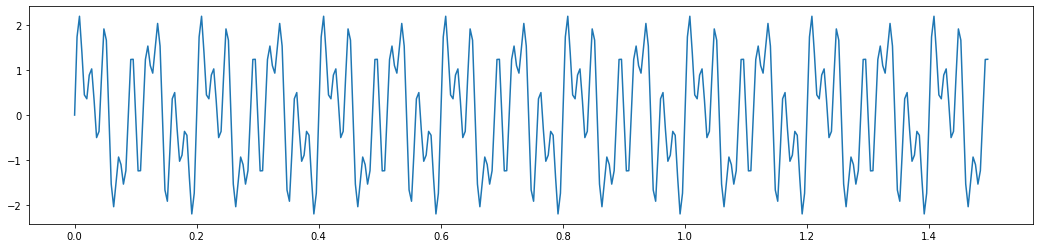

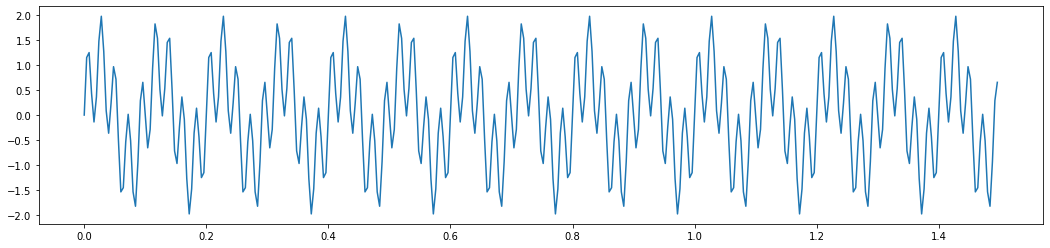

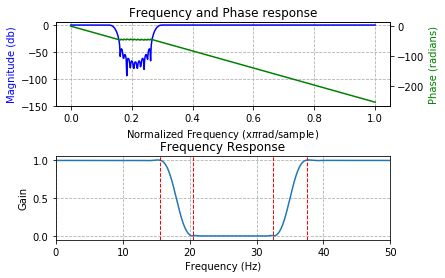

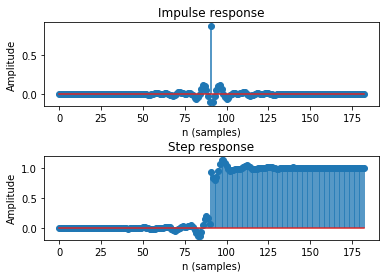

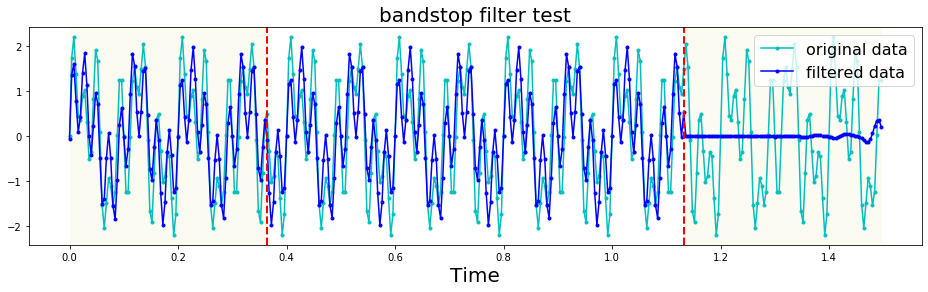

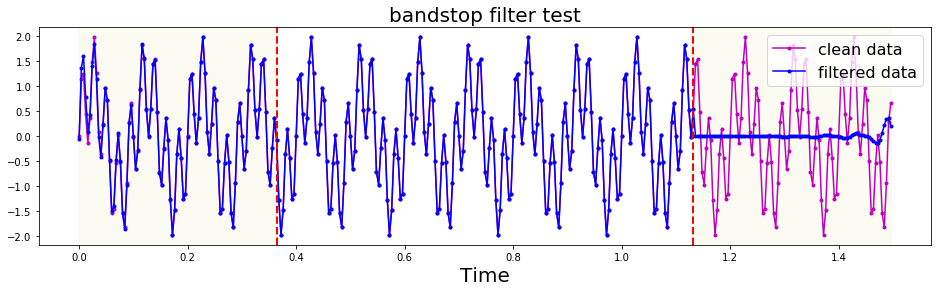

In [28]:
# creat a fakedata to show the filter
freq_list = [10, 25, 45]
amplitude_list = [1.0, 1.0, 1.0]
t, y = filters._sins_test_data(freq_list, amplitude_list, sampling_freq)
#plt.clf()
# we need to try bandstop filter, only keep 10,45 in freq_list, so create a clean data
freq_list = [10, 45]
amplitude_list = [1.0, 1.0]
t, y1 = filters._sins_test_data(freq_list, amplitude_list, sampling_freq)
#plt.clf()

testdata = pd.DataFrame({"fakedata": y})

ftype = "bandstop"
window = "hann"
cutoff_hz = [18, 35]
width_hz = 5
ripple_db = 60
sfreq = sampling_freq

filt_test_df = filters.epochs_filters(
    testdata,
    ["fakedata"],
    ftype,
    window,
    cutoff_hz,
    width_hz,
    ripple_db,
    sfreq,
    trim_edges=False,
)
y_filt = filt_test_df["fakedata"]


# need to know N to cut
taps = filters._design_firwin_filter(cutoff_hz, width_hz, ripple_db, sfreq, ftype, window)
N = len(taps)

# print filter information
text1 = f" {ftype} filter"
print(text1)
text2 = f" sample rate, fs={sfreq} \n cutoff_hz = {cutoff_hz} \n width of transition, width={width_hz} hz \n ripple_db={ripple_db} \n FIR filter size: numtaps = {len(taps)}, time = {len(taps)/sfreq} s \n delay = {int((len(taps) - 1) / 2)} , delay_time = {len(taps)/(2*sfreq)} s"
print(text2)

# show filter response images
fig1 = filters._mfreqz(taps,sfreq,cutoff_hz,width_hz,a=1)
fig2 = filters._impz(taps,a=1)

fig, ax = plt.subplots(figsize=(16, 4))

ax.plot(t,y, '.-',  color= 'c', linestyle='-', label="original data")
ax.plot(t,y_filt, '.-',  color= 'b', linestyle='-', label="filtered data")
half_width = int(np.floor(N / 2))
times = t
start_good = times[half_width]  # == first good sample b.c. 0-base index
stop_good = times[-(half_width + 1)]
ax.axvline(start_good, linestyle='--', linewidth=2, color='r')
ax.axvspan(min(times), start_good, alpha=0.05, color='y')
ax.axvline(stop_good, linestyle='--', linewidth=2, color='r')
ax.axvspan(stop_good, max(times), alpha=0.05, color='y')  

ax.set_title(f"{ftype} filter test", fontsize=20)
ax.set_xlabel('Time', fontsize=20)
ax.legend(fontsize=16,loc=1)
#ax.grid(True)

fig, ax = plt.subplots(figsize=(16, 4))

ax.plot(t,y1, '.-',  color= 'm', linestyle='-', label="clean data")
ax.plot(t,y_filt, '.-',  color= 'b', linestyle='-', label="filtered data")
half_width = int(np.floor(N / 2))
times = t
start_good = times[half_width]  # == first good sample b.c. 0-base index
stop_good = times[-(half_width + 1)]
ax.axvline(start_good, linestyle='--', linewidth=2, color='r')
ax.axvspan(min(times), start_good, alpha=0.05, color='y')
ax.axvline(stop_good, linestyle='--', linewidth=2, color='r')
ax.axvspan(stop_good, max(times), alpha=0.05, color='y')  

ax.set_title(f"{ftype} filter test", fontsize=20)
ax.set_xlabel('Time', fontsize=20)
ax.legend(fontsize=16,loc=1)
#ax.grid(True)

plt.show()

 highpass filter
 sample rate, fs=250 
 cutoff_hz = 12.5 
 width of transition, width=5 hz 
 ripple_db=60 
 FIR filter size: numtaps = 183, time = 0.732 s 
 delay = 91 , delay_time = 0.366 s


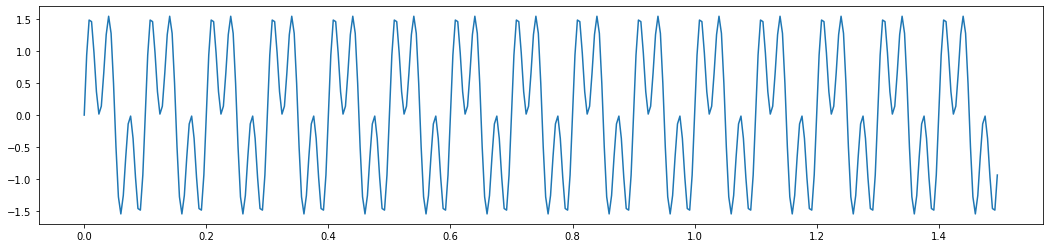

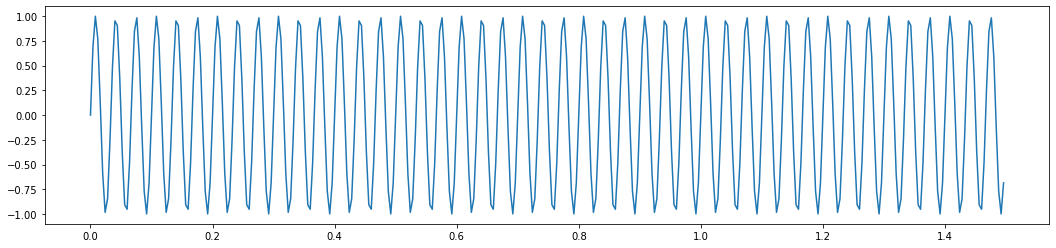

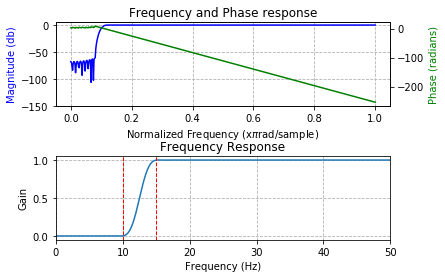

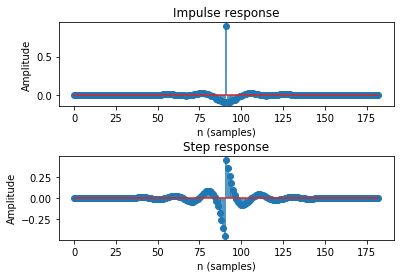

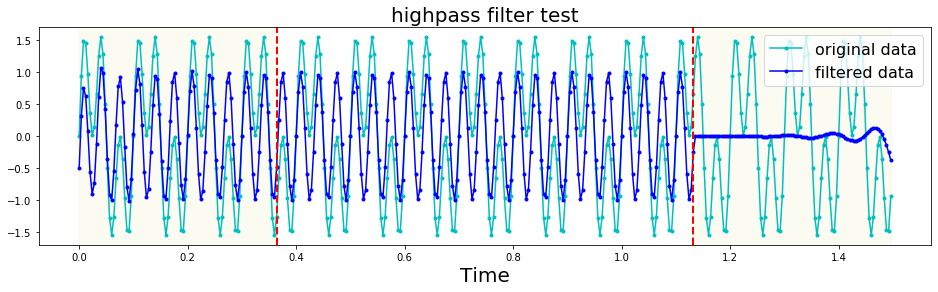

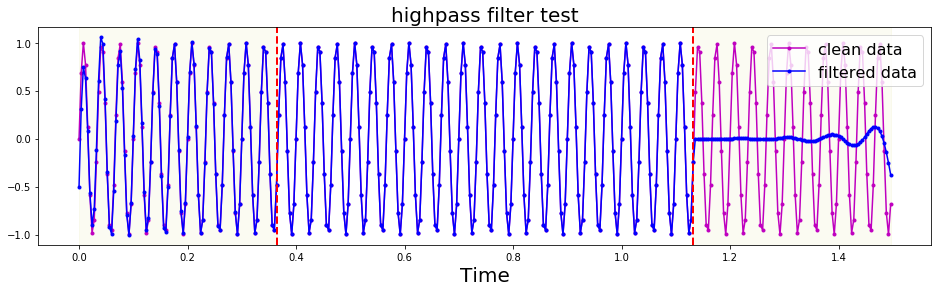

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import signal, fftpack
from pylab import *
import spudtr.filters as filters

import logging as LOGGER
from scipy.signal import kaiserord, firwin, freqz, lfilter

plt.clf()
plt.close('all')

# creat a fakedata to show the filter
freq_list = [10, 30]
amplitude_list = [1.0, 1.0]
t, y = filters._sins_test_data(freq_list, amplitude_list, sampling_freq)
#plt.clf()
# we need to try highpass filter, only keep 30 in above freq_list, so create a clean data
freq_list = [30]
amplitude_list = [1.0]
t, y1 = filters._sins_test_data(freq_list, amplitude_list, sampling_freq)
#plt.clf()

testdata = pd.DataFrame({"fakedata": y})

ftype = "highpass"
window = "kaiser"
cutoff_list = [12.5]
cutoff_hz = 12.5
width_hz = 5
ripple_db = 60
sfreq = sampling_freq

filt_test_df = filters.epochs_filters(
    testdata,
    ["fakedata"],
    ftype,
    window,
    cutoff_hz,
    width_hz,
    ripple_db,
    sfreq,
    trim_edges=False,
)
y_filt = filt_test_df["fakedata"]

# need to know N
taps = filters._design_firwin_filter(cutoff_hz, width_hz, ripple_db, sfreq, ftype, window)
N = len(taps)

# print filter information
text1 = f" {ftype} filter"
print(text1)
text2 = f" sample rate, fs={sfreq} \n cutoff_hz = {cutoff_hz} \n width of transition, width={width_hz} hz \n ripple_db={ripple_db} \n FIR filter size: numtaps = {len(taps)}, time = {len(taps)/sfreq} s \n delay = {int((len(taps) - 1) / 2)} , delay_time = {len(taps)/(2*sfreq)} s"
print(text2)

# show filter response images
fig1 = filters._mfreqz(taps,sfreq,cutoff_hz,width_hz,a=1)
fig2 = filters._impz(taps,a=1)

fig, ax = plt.subplots(figsize=(16, 4))

ax.plot(t,y, '.-',  color= 'c', linestyle='-', label="original data")
ax.plot(t,y_filt, '.-',  color= 'b', linestyle='-', label="filtered data")
half_width = int(np.floor(N / 2))
times = t
start_good = times[half_width]  # == first good sample b.c. 0-base index
stop_good = times[-(half_width + 1)]
ax.axvline(start_good, linestyle='--', linewidth=2, color='r')
ax.axvspan(min(times), start_good, alpha=0.05, color='y')
ax.axvline(stop_good, linestyle='--', linewidth=2, color='r')
ax.axvspan(stop_good, max(times), alpha=0.05, color='y')  

ax.set_title(f"{ftype} filter test", fontsize=20)
ax.set_xlabel('Time', fontsize=20)
ax.legend(fontsize=16,loc=1)
#ax.grid(True)

fig, ax = plt.subplots(figsize=(16, 4))

ax.plot(t,y1, '.-',  color= 'm', linestyle='-', label="clean data")
ax.plot(t,y_filt, '.-',  color= 'b', linestyle='-', label="filtered data")
half_width = int(np.floor(N / 2))
times = t
start_good = times[half_width]  # == first good sample b.c. 0-base index
stop_good = times[-(half_width + 1)]
ax.axvline(start_good, linestyle='--', linewidth=2, color='r')
ax.axvspan(min(times), start_good, alpha=0.05, color='y')
ax.axvline(stop_good, linestyle='--', linewidth=2, color='r')
ax.axvspan(stop_good, max(times), alpha=0.05, color='y')  

ax.set_title(f"{ftype} filter test", fontsize=20)
ax.set_xlabel('Time', fontsize=20)
ax.legend(fontsize=16,loc=1)
#ax.grid(True)
plt.show()

